In [1]:
import os
import tb
import seaborn as sns
import pandas as pd
import matplotlib.style as style

# set matplotlib style
style.use("seaborn-v0_8-colorblind")

In [2]:
train_files = [os.path.join(".", "train", "trees", f) for f in os.listdir(os.path.join(".", "train", "trees")) if not f.startswith(".")]
dev_files = [os.path.join(".", "dev", "trees", f) for f in os.listdir(os.path.join(".", "dev", "trees")) if not f.startswith(".")]
test_files = [os.path.join(".", "test", "trees", f) for f in os.listdir(os.path.join(".", "test", "trees")) if not f.startswith(".")]

all_files = train_files + dev_files + test_files

print("-----TESTS-----\n")
print("total number of swb files:", len(all_files))

-----TESTS-----

total number of swb files: 650


In [3]:
disfluency_dict = {"INTJ": 0,
                   "PRN": 0,
                   "EDITED": 0}

# adapted from tb.py, yields leaf nodes without CODE, EDITED, INTJ, or PRN nodes
def get_disfluency_counts(tree):
    def visit(node):
        if isinstance(node, list):
            for child in node[1:]:
                if "EDITED" in child:
                    disfluency_dict["EDITED"] += 1
                elif "INTJ" in child:
                    disfluency_dict["INTJ"] += 1
                elif "PRN" in child:
                    disfluency_dict["PRN"] += 1
                elif "CODE" in child:
                    continue
                else:
                    yield from visit(child)
        else:
            yield node
    yield from visit(tree) 

In [4]:
disfluency_dict = {"INTJ": 0, "PRN": 0, "EDITED": 0}
for f in all_files:
    tb_file = tb.read_file(f)
    _ = list(get_disfluency_counts(tb_file))
print(disfluency_dict)

df_dict = {"split":[], "dis":[], "number":[]}
for k,v in disfluency_dict.items():
    df_dict["split"].append("all")
    df_dict["dis"].append(k)
    df_dict["number"].append(v)
print(df_dict)

# df = pd.DataFrame(df_dict, index=df_dict.keys())
# sns.barplot(df, x="dis", y="number", hue="split")

{'INTJ': 63116, 'PRN': 12140, 'EDITED': 25707}
{'split': ['all', 'all', 'all'], 'dis': ['INTJ', 'PRN', 'EDITED'], 'number': [63116, 12140, 25707]}


In [5]:
disfluency_dict = {"INTJ": 0, "PRN": 0, "EDITED": 0}
for f in train_files:
    tb_file = tb.read_file(f)
    _ = list(get_disfluency_counts(tb_file))
print(disfluency_dict)

for k,v in disfluency_dict.items():
    df_dict["split"].append("train")
    df_dict["dis"].append(k)
    df_dict["number"].append(v)
print(df_dict)

# df = pd.DataFrame(df_dict)
# sns.barplot(df, x="dis", y="number", hue="split")

{'INTJ': 51718, 'PRN': 9731, 'EDITED': 20304}
{'split': ['all', 'all', 'all', 'train', 'train', 'train'], 'dis': ['INTJ', 'PRN', 'EDITED', 'INTJ', 'PRN', 'EDITED'], 'number': [63116, 12140, 25707, 51718, 9731, 20304]}


In [6]:
disfluency_dict = {"INTJ": 0, "PRN": 0, "EDITED": 0}
for f in dev_files:
    tb_file = tb.read_file(f)
    _ = list(get_disfluency_counts(tb_file))
print(disfluency_dict)

for k,v in disfluency_dict.items():
    df_dict["split"].append("dev")
    df_dict["dis"].append(k)
    df_dict["number"].append(v)
print(df_dict)

# df = pd.DataFrame(df_dict)
# sns.barplot(df, x="dis", y="number", hue="split")

{'INTJ': 4816, 'PRN': 1040, 'EDITED': 2072}
{'split': ['all', 'all', 'all', 'train', 'train', 'train', 'dev', 'dev', 'dev'], 'dis': ['INTJ', 'PRN', 'EDITED', 'INTJ', 'PRN', 'EDITED', 'INTJ', 'PRN', 'EDITED'], 'number': [63116, 12140, 25707, 51718, 9731, 20304, 4816, 1040, 2072]}


{'INTJ': 6582, 'PRN': 1369, 'EDITED': 3331}
{'split': ['all', 'all', 'all', 'train', 'train', 'train', 'dev', 'dev', 'dev', 'test', 'test', 'test'], 'dis': ['INTJ', 'PRN', 'EDITED', 'INTJ', 'PRN', 'EDITED', 'INTJ', 'PRN', 'EDITED', 'INTJ', 'PRN', 'EDITED'], 'number': [63116, 12140, 25707, 51718, 9731, 20304, 4816, 1040, 2072, 6582, 1369, 3331]}


<Axes: xlabel='dis', ylabel='number'>

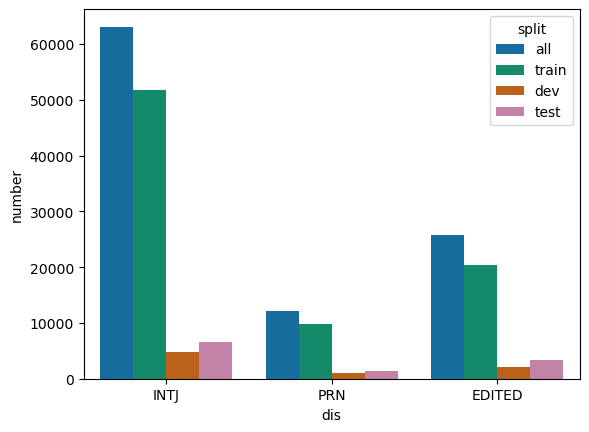

In [7]:
disfluency_dict = {"INTJ": 0, "PRN": 0, "EDITED": 0}
for f in test_files:
    tb_file = tb.read_file(f)
    _ = list(get_disfluency_counts(tb_file))
print(disfluency_dict)

for k,v in disfluency_dict.items():
    df_dict["split"].append("test")
    df_dict["dis"].append(k)
    df_dict["number"].append(v)
print(df_dict)

df = pd.DataFrame(df_dict)
sns.barplot(df, x="dis", y="number", hue="split")